In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from modAL.models import BayesianOptimizer
from modAL.acquisition import optimizer_EI, max_EI

%matplotlib inline

In [49]:
X, y = np.load("dataset/mass_batch.npy"), np.load("dataset/res_v.npy")
initial_X, initial_y = np.load("initial_data/initial_X.npy"), np.load("initial_data/initial_y.npy")

In [34]:
# Number of arrays to randomly sample
num_arrays_to_sample = 4  # You can adjust this as needed

# Randomly choose one or more arrays from the nested array
random_arrays_indices = np.random.choice(X.shape[0], size=num_arrays_to_sample, replace=False)
random_arrays = X[random_arrays_indices]

# Print the result
print(f"Randomly chosen {num_arrays_to_sample} array(s):")
print(random_arrays)

initial_X = random_arrays

initial_y = []
for i in initial_X:
    indice = np.where(np.all(X == i, axis=1))[0][0]
    initial_y.append(y[indice])

initial_y = np.array(initial_y)

Randomly chosen 4 array(s):
[[0.336 0.016 0.648]
 [0.    0.212 0.788]
 [0.568 0.14  0.292]
 [0.224 0.14  0.636]]


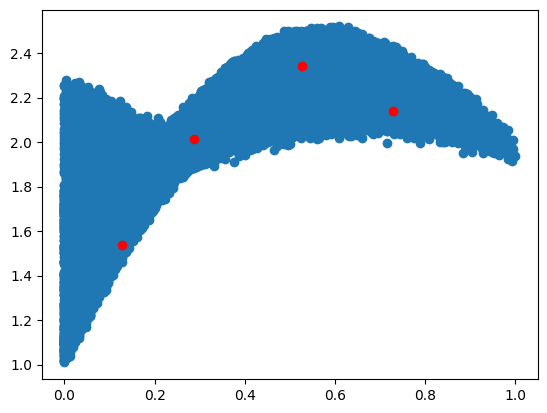

In [50]:
plt.scatter(X[:, 0], y)
plt.scatter(initial_X[:, 0], initial_y, c = 'r')

In [51]:
# defining the kernel for the Gaussian process
kernel = Matern(length_scale=1.0)
regressor = GaussianProcessRegressor(kernel=kernel)

In [52]:
# initializing the optimizer
optimizer = BayesianOptimizer(
    estimator=regressor,
    X_training=initial_X, y_training=initial_y,
    query_strategy=max_EI
)

In [53]:
# Bayesian optimization
FOM_pred = []
for n_query in range(100):
    query_idx, query_inst = optimizer.query(X)
    optimizer.teach(X[query_idx], y[query_idx])
    FOM_pred.append(y[query_idx].item())

Query idx : [25777], Query_inst : [[0.572 0.148 0.28 ]]
Query idx : [26475], Query_inst : [[0.6 0.  0.4]]
Query idx : [24895], Query_inst : [[0.54 0.22 0.24]]
Query idx : [23558], Query_inst : [[0.496 0.24  0.264]]
Query idx : [25903], Query_inst : [[0.576 0.22  0.204]]
Query idx : [0], Query_inst : [[0. 0. 1.]]
Query idx : [13481], Query_inst : [[0.244 0.    0.756]]
Query idx : [25239], Query_inst : [[0.552 0.216 0.232]]
Query idx : [1], Query_inst : [[0.    0.004 0.996]]
Query idx : [26539], Query_inst : [[0.6   0.256 0.144]]
Query idx : [22470], Query_inst : [[0.464 0.096 0.44 ]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [29365], Query_inst : [[0.736 0.068 0.196]]
Query idx : [24789], Query_inst : [[0.536 0.264 0.2  ]]
Query idx : [27840], Query_inst : [[0.656 0.168 0.176]]
Query idx : [3471], Query_inst : [[0.056 0.192 0.752]]
Query idx : [24542], Query_inst : [[0.528 0.224 0.248]]
Query idx : [21329], Query_inst : [[0.428 0.572 0.   ]]
Query idx : [19173], Query_inst : [[0.372 0.432 0.196]]
Query idx : [31581], Query_inst : [[0.968 0.    0.032]]
Query idx : [5975], Query_inst : [[0.1 0.  0.9]]
Query idx : [27548], Query_inst : [[0.644 0.068 0.288]]
Query idx : [7955], Query_inst : [[0.132 0.8   0.068]]
Query idx : [13820], Query_inst : [[0.248 0.596 0.156]]
Query idx : [24042], Query_inst : [[0.512 0.168 0.32 ]]
Query idx : [24662], Query_inst : [[0.532 0.228 0.24 ]]
Query idx : [2], Query_inst : [[0.    0.008 0.992]]
Query idx : [3], Query_inst : [[0.    0.012 0.988]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [4], Query_inst : [[0.    0.016 0.984]]
Query idx : [5], Query_inst : [[0.   0.02 0.98]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [6], Query_inst : [[0.    0.024 0.976]]
Query idx : [7], Query_inst : [[0.    0.028 0.972]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [8], Query_inst : [[0.    0.032 0.968]]
Query idx : [9], Query_inst : [[0.    0.036 0.964]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [10], Query_inst : [[0.   0.04 0.96]]
Query idx : [11], Query_inst : [[0.    0.044 0.956]]
Query idx : [12], Query_inst : [[0.    0.048 0.952]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [13], Query_inst : [[0.    0.052 0.948]]
Query idx : [14], Query_inst : [[0.    0.056 0.944]]
Query idx : [15], Query_inst : [[0.   0.06 0.94]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [16], Query_inst : [[0.    0.064 0.936]]
Query idx : [17], Query_inst : [[0.    0.068 0.932]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [18], Query_inst : [[0.    0.072 0.928]]
Query idx : [19], Query_inst : [[0.    0.076 0.924]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [20], Query_inst : [[0.   0.08 0.92]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [21], Query_inst : [[0.    0.084 0.916]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [22], Query_inst : [[0.    0.088 0.912]]
Query idx : [23], Query_inst : [[0.    0.092 0.908]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [24], Query_inst : [[0.    0.096 0.904]]
Query idx : [25], Query_inst : [[0.  0.1 0.9]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [26], Query_inst : [[0.    0.104 0.896]]
Query idx : [27], Query_inst : [[0.    0.108 0.892]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [28], Query_inst : [[0.    0.112 0.888]]
Query idx : [29], Query_inst : [[0.    0.116 0.884]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [30], Query_inst : [[0.   0.12 0.88]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [31], Query_inst : [[0.    0.124 0.876]]
Query idx : [32], Query_inst : [[0.    0.128 0.872]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [33], Query_inst : [[0.    0.132 0.868]]
Query idx : [34], Query_inst : [[0.    0.136 0.864]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [35], Query_inst : [[0.   0.14 0.86]]
Query idx : [36], Query_inst : [[0.    0.144 0.856]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [37], Query_inst : [[0.    0.148 0.852]]
Query idx : [38], Query_inst : [[0.    0.152 0.848]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [39], Query_inst : [[0.    0.156 0.844]]
Query idx : [40], Query_inst : [[0.   0.16 0.84]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [41], Query_inst : [[0.    0.164 0.836]]
Query idx : [42], Query_inst : [[0.    0.168 0.832]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [43], Query_inst : [[0.    0.172 0.828]]
Query idx : [44], Query_inst : [[0.    0.176 0.824]]
Query idx : [45], Query_inst : [[0.   0.18 0.82]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [46], Query_inst : [[0.    0.184 0.816]]
Query idx : [47], Query_inst : [[0.    0.188 0.812]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [48], Query_inst : [[0.    0.192 0.808]]
Query idx : [49], Query_inst : [[0.    0.196 0.804]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [50], Query_inst : [[0.  0.2 0.8]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [51], Query_inst : [[0.    0.204 0.796]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [52], Query_inst : [[0.    0.208 0.792]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [53], Query_inst : [[0.    0.212 0.788]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [54], Query_inst : [[0.    0.216 0.784]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [55], Query_inst : [[0.   0.22 0.78]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [56], Query_inst : [[0.    0.224 0.776]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [57], Query_inst : [[0.    0.228 0.772]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [58], Query_inst : [[0.    0.232 0.768]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [59], Query_inst : [[0.    0.236 0.764]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [60], Query_inst : [[0.   0.24 0.76]]
Query idx : [61], Query_inst : [[0.    0.244 0.756]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [62], Query_inst : [[0.    0.248 0.752]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [63], Query_inst : [[0.    0.252 0.748]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [64], Query_inst : [[0.    0.256 0.744]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [65], Query_inst : [[0.   0.26 0.74]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [66], Query_inst : [[0.    0.264 0.736]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [67], Query_inst : [[0.    0.268 0.732]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [68], Query_inst : [[0.    0.272 0.728]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [69], Query_inst : [[0.    0.276 0.724]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [70], Query_inst : [[0.   0.28 0.72]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [71], Query_inst : [[0.    0.284 0.716]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [72], Query_inst : [[0.    0.288 0.712]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [73], Query_inst : [[0.    0.292 0.708]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [74], Query_inst : [[0.    0.296 0.704]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [75], Query_inst : [[0.  0.3 0.7]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Query idx : [76], Query_inst : [[0.    0.304 0.696]]


c:\ProgramData\mambaforge\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Text(0, 0.5, 'FOM')

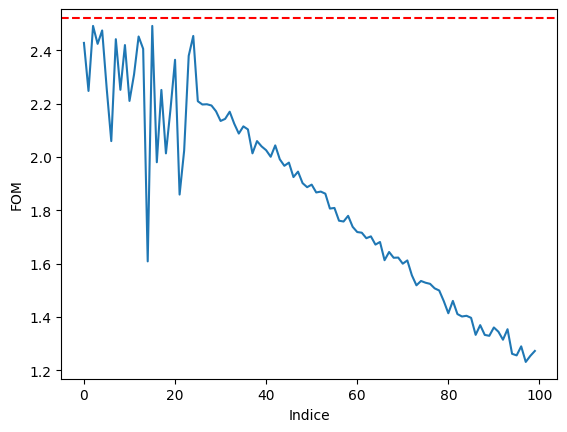

In [55]:
plt.plot(FOM_pred)
plt.axhline(y=np.max(y), color='red', linestyle='--', label='Target Objective FOM')
plt.xlabel('Indice')
plt.ylabel('FOM')

In [39]:
y_pred, y_std = optimizer.predict(X, return_std=True)
y_pred, y_std = y_pred.ravel(), y_std.ravel()
X_max, y_max = optimizer.get_max()

In [40]:
X_max

array([0.596, 0.184, 0.22 ])

In [41]:
y_max

2.4881183265160876

In [42]:
optimizer.X_training

array([[0.336, 0.016, 0.648],
       [0.   , 0.212, 0.788],
       [0.568, 0.14 , 0.292],
       [0.224, 0.14 , 0.636],
       [1.   , 0.   , 0.   ],
       [0.664, 0.   , 0.336],
       [0.56 , 0.4  , 0.04 ],
       [0.596, 0.184, 0.22 ],
       [0.66 , 0.172, 0.168]])

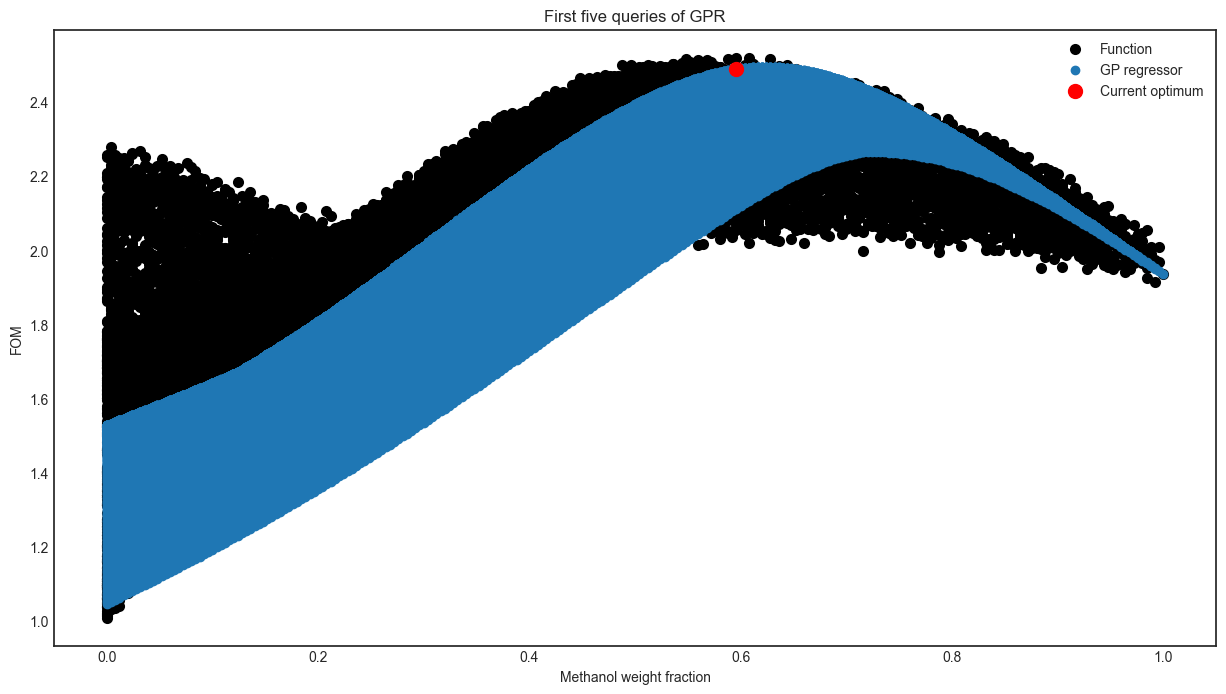

In [48]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(15, 8))
    #plt.scatter(optimizer.X_training[:, 0], optimizer.y_training, c='k', s=50, label='Queried')
    plt.scatter(X[:, 0], y, c='k', linewidth=2, label='Function')
    plt.scatter(X[:, 0], y_pred, label='GP regressor')
    #plt.fill_between(X[:, 0], y_pred - y_std, y_pred + y_std, alpha=0.5)
    plt.scatter(X_max[0], y_max, s=100, c='r', label='Current optimum')
    plt.title('First five queries of GPR')
    plt.xlabel('Methanol weight fraction')
    plt.ylabel('FOM')
    plt.legend()
    plt.show()

Text(0.5, 1.0, 'Distribution of FOM')

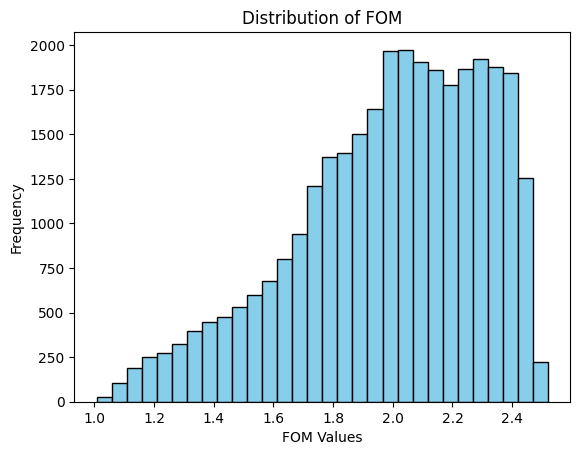

In [61]:
plt.hist(y, bins = 30, color = 'skyblue', edgecolor = 'black')
plt.xlabel('FOM Values')
plt.ylabel('Frequency')
plt.title('Distribution of FOM')